<a href="https://www.kaggle.com/nurbekserzhanov/disease-prediction-using-two-data-sets?scriptVersionId=87221000" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/symptom-checker/Training.csv
/kaggle/input/symptom-checker/Testing.csv
/kaggle/input/disease-symptom-description-dataset/symptom_Description.csv
/kaggle/input/disease-symptom-description-dataset/Symptom-severity.csv
/kaggle/input/disease-symptom-description-dataset/symptom_precaution.csv
/kaggle/input/disease-symptom-description-dataset/dataset.csv


In [2]:
data=pd.read_csv("/kaggle/input/disease-symptom-description-dataset/dataset.csv")
#Getting the inforamtion about this data set and filling the Nan values with "Unknow"
print(data.head())
print(data.shape)

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

In [3]:
data["list_of_Symps"] = 0
for i in range(data.shape[0]):
    values = data.iloc[i].values
    values = values.tolist()
    if 0 in values:
        data["list_of_Symps"][i] = values[1:values.index(0)]
    else:
        data["list_of_Symps"][i] = values[1:]


print(data.tail)
print(data.head())
description=pd.read_csv("/kaggle/input/disease-symptom-description-dataset/symptom_Description.csv")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<bound method NDFrame.tail of                                       Disease             Symptom_1  \
0                            Fungal infection               itching   
1                            Fungal infection             skin_rash   
2                            Fungal infection               itching   
3                            Fungal infection               itching   
4                            Fungal infection               itching   
...                                       ...                   ...   
4915  (vertigo) Paroymsal  Positional Vertigo              vomiting   
4916                                     Acne             skin_rash   
4917                  Urinary tract infection   burning_micturition   
4918                                Psoriasis             skin_rash   
4919                                 Impetigo             skin_rash   

                  Symptom_2              Symptom_3                  Symptom_4  \
0                 skin_rash   nodal_

In [4]:

objects = (data.dtypes == 'object')
object_cols = list(objects[objects].index)
print(object_cols)
column_values = data[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']].values.ravel()
print(column_values)
symptoms=pd.unique(column_values.tolist())
#we have nan values
symptoms = [i for i in symptoms if str(i) != "nan"]
print(len(symptoms))

new_data = pd.DataFrame(columns = symptoms,index = data.index)
#adding the disease
new_data['list_of_Symps']=data['list_of_Symps']

#Filling our data frame with 
for i in new_data:
    new_data[i] = data.apply(lambda x:1 if i in x.list_of_Symps else 0, axis=1)


['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17', 'list_of_Symps']
['itching' ' skin_rash' ' nodal_skin_eruptions' ... nan nan nan]
131


In [5]:
new_data['Disease']=data['Disease']
new_data=new_data.drop('list_of_Symps',axis=1)

print(new_data.head())

#Spliting the data vset
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(new_data, test_size=0.2, random_state=25)
X_train_data=training_data.drop("Disease",axis=1)
y_train_data = training_data["Disease"].copy()
X_test = testing_data.drop("Disease",axis=1)
y_test = testing_data["Disease"].copy()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


   itching   skin_rash   nodal_skin_eruptions   dischromic _patches  \
0        1           1                      1                     1   
1        0           1                      1                     1   
2        1           0                      1                     1   
3        1           1                      0                     1   
4        1           1                      1                     0   

    continuous_sneezing   shivering   chills   watering_from_eyes  \
0                     0           0        0                    0   
1                     0           0        0                    0   
2                     0           0        0                    0   
3                     0           0        0                    0   
4                     0           0        0                    0   

    stomach_pain   acidity  ...   foul_smell_of urine  \
0              0         0  ...                     0   
1              0         0  ...             

In [6]:

#RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train_data,y_train_data)
print(X_train_data.shape)
print(y_train_data.shape)
y_pred=rnd_forest.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(cross_val_score(rnd_forest,X_train_data,y_train_data,cv=5).mean())
'''
It shows 100% ,wow!
'''

#It gives 100% accuracy 
#Let`s see how the tree was drew
from sklearn.tree import export_graphviz
# Export as dot file
estimator = rnd_forest.estimators_[1]


(3936, 131)
(3936,)
Accuracy: 1.0
1.0


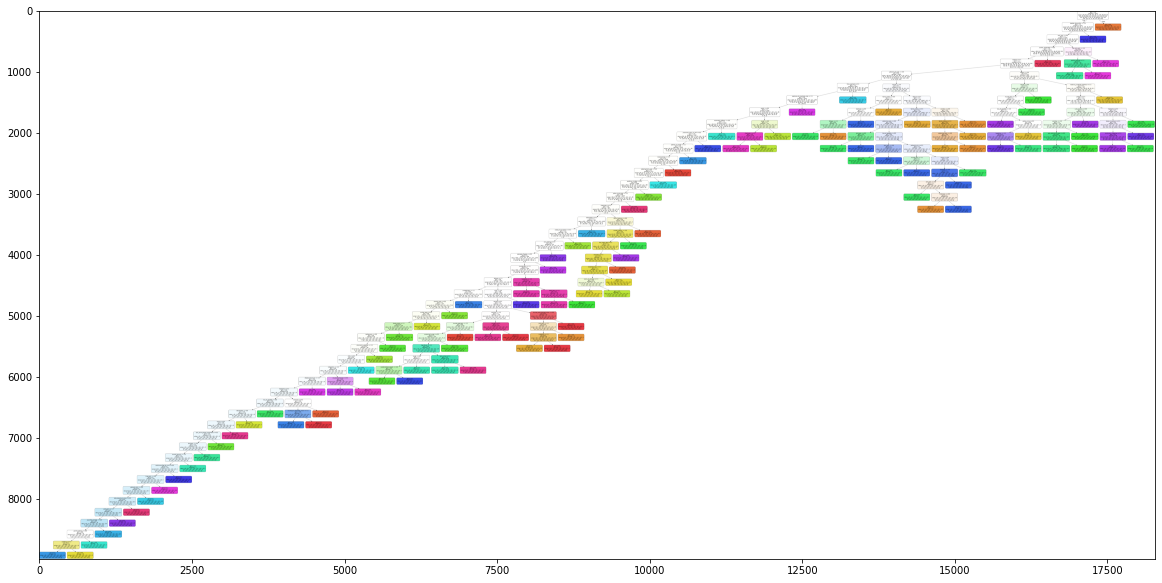

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, 
                out_file='tree.dot', 
                    feature_names = X_train_data.columns,
                rounded = True, proportion = False, 
                precision = 1, filled = True)
! dot -Tpng tree.dot -o tree.png
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

In [8]:
'''
I've found a new data on the same topic so we can test our model on this data
'''

next_new_data_test=pd.read_csv("/kaggle/input/symptom-checker/Testing.csv")
next_new_data_test.rename(columns={'prognosis': 'Disease'},inplace=True)
next_new_data_test=next_new_data_test.drop("fluid_overload.1",axis=1)

#There is +1 column than in our prevois data
list_of_column=list(next_new_data_test.columns)

print(len(list_of_column))
print(len(symptoms))


next_new_data_test.head()
next_new_data_train=pd.read_csv("/kaggle/input/symptom-checker/Training.csv")
next_new_data_train.rename(columns={'prognosis': 'Disease'},inplace=True)
next_new_data_train=next_new_data_train.drop("fluid_overload.1",axis=1)


132
131


In [9]:
new_X_test = next_new_data_test.drop("Disease",axis=1)
new_Y_test = next_new_data_test["Disease"].copy()
new_X_train=next_new_data_train.drop("Disease",axis=1)
new_Y_train = next_new_data_train["Disease"].copy()

new_y_pred=rnd_forest.predict(new_X_test)
#the last 20 predicted and actual values
print(new_y_pred[:20])
print(new_Y_test[:20])

# Model Accuracy, how often is the classifier correct on new data?
cross_val_score(rnd_forest,new_X_train,new_Y_train,cv=5).mean()
print("Accuracy for new old_model:",metrics.accuracy_score(new_Y_test, new_y_pred))
new_X_test.head()

'''
On new data_training set  we can see that our performance is rly good ,
but when we are trying to make see how often our model is correct on testing data it gives us only 9-17 %
'''
'''
Now,I want to create the same model and fit it the new data 

'''
rnd_forest_new = RandomForestClassifier()
rnd_forest_new.fit(new_X_train,new_Y_train)
new_y_pred_new_model=rnd_forest_new.predict(new_X_test)
print("Accuracy for new using new model:",metrics.accuracy_score(new_Y_test, new_y_pred_new_model))
'''
Accuracy is 100 % ,The RandomForests dont overfit but they have different performances on different values. 
Lets try another model .I want to see the KNN performance.
'''
print("The shape of old_train data",X_train_data.shape)
print("The shape of old_train data",new_X_train.shape)

['Fungal infection' 'Allergy' 'Paralysis (brain hemorrhage)'
 'Gastroenteritis' 'Allergy' 'Gastroenteritis' 'GERD' 'Hypothyroidism'
 'Gastroenteritis' 'AIDS' 'Paralysis (brain hemorrhage)' 'Varicose veins'
 'Diabetes ' 'Gastroenteritis' 'Gastroenteritis' 'Varicose veins'
 'Heart attack' 'Diabetes ' 'Gastroenteritis' 'Varicose veins']
0                 Fungal infection
1                          Allergy
2                             GERD
3              Chronic cholestasis
4                    Drug Reaction
5              Peptic ulcer diseae
6                             AIDS
7                        Diabetes 
8                  Gastroenteritis
9                 Bronchial Asthma
10                   Hypertension 
11                        Migraine
12            Cervical spondylosis
13    Paralysis (brain hemorrhage)
14                        Jaundice
15                         Malaria
16                     Chicken pox
17                          Dengue
18                         Typhoid

In [10]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_old = KNeighborsClassifier(n_neighbors = 7).fit(X_train_data, y_train_data)
knn_new = KNeighborsClassifier(n_neighbors = 7).fit(new_X_train, new_Y_train)

from sklearn.metrics import plot_confusion_matrix
#Testing for both data_sets
knn_predictions_new = knn_new.predict(new_X_test)
knn_predictions_old = knn_old.predict(X_test)
knn_1=knn_new.predict(X_test)
knn_2=knn_old.predict(new_X_test)
#Testing for both models different data sets
print("Accuracy for new:",metrics.accuracy_score(new_Y_test, knn_predictions_new))
print("Accuracy for old:",metrics.accuracy_score(y_test, knn_predictions_old))
print("Accuracy for new using knn_old:",metrics.accuracy_score(new_Y_test, knn_2))
print("Accuracy for old using knn_new:",metrics.accuracy_score(y_test, knn_1))
'''
The performance of new data using knn_old model is bad.And vice versa the performance of old data using knn_new model is also bad.
I think it's coming up like that because the data is not representative enough .I want to see the performance of the Random Forest model for both data.We will concatenate them'''

Accuracy for new: 1.0
Accuracy for old: 1.0
Accuracy for new using knn_old: 0.14634146341463414
Accuracy for old using knn_new: 0.18292682926829268


"\nThe performance of new data using knn_old model is bad.And vice versa the performance of old data using knn_new model is also bad.\nI think it's coming up like that because the data is not representative enough .I want to see the performance of the Random Forest model for both data.We will concatenate them"

In [11]:
#Xtrain
new_columns=list(new_X_train.columns)#Im doing like that because there is a unnecessary space in X_trains columns (' column_name' in X_test)
X_train_data.columns=new_columns
print(X_train_data.columns)
list_organized_data_train=[new_X_train,X_train_data]
organized_data_train = pd.concat(list_organized_data_train)
display(organized_data_train)
print(organized_data_train.isnull().sum())
#Y_train
list_organized_data_test=[new_Y_train,y_train_data]
print(new_Y_train.shape)
print(y_train_data.shape)
organized_data_test = pd.concat(list_organized_data_test)
display(organized_data_test)

#X_test
new_test_colums=list(new_X_test.columns)
X_test.columns=new_test_colums
list_organized_X_test=[new_X_test,X_test]
organized_X_test = pd.concat(list_organized_X_test)
display(organized_X_test)

#Y_test
list_organized_Y_test=[new_Y_test,y_test]
organized_Y_test = pd.concat(list_organized_Y_test)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=131)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2191,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Length: 131, dtype: int64
(4920,)
(3936,)


0       Fungal infection
1       Fungal infection
2       Fungal infection
3       Fungal infection
4       Fungal infection
              ...       
1175           Arthritis
255         Tuberculosis
2934         Hepatitis E
2191            Jaundice
318       Hypothyroidism
Name: Disease, Length: 8856, dtype: object

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1507,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2813,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
rnd_forest_org = RandomForestClassifier()
rnd_forest_org.fit(organized_data_train,organized_data_test)
y_pred_org=rnd_forest_org.predict(organized_X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(organized_Y_test, y_pred_org))
print(cross_val_score(rnd_forest_org,organized_data_train,organized_data_test,cv=5).mean())
#It gives 100% accuracy 
#Cross validation is 99,8%



Accuracy: 1.0
0.9986450883496717


In [13]:
#Now lets apply first data_set on this model
y2_old_data_set_pre=rnd_forest_org.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y2_old_data_set_pre))
y2_new_data_set_pre=rnd_forest_org.predict(new_X_test)
print("Accuracy:",metrics.accuracy_score(new_Y_test, y2_new_data_set_pre))
#Both are 100%
'''
As we can see we achieved a good results.
'''

Accuracy: 1.0
Accuracy: 1.0


'\nAs we can see we achieved a good results.\n'

In [14]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(rnd_forest_org,f)
    

In [15]:
print(len(list(X_test.columns)))
print(len(list(new_X_test.columns)))

131
131
